# Importing Libraries and Dataset

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
dataset = pd.read_csv("./CSV/train_dataset.csv")

# Step 1: Data Understanding, Cleaning and Pre-processing

In [3]:
dataset.head()

,url,label,source,url_has_login,url_has_client,url_has_server,url_has_admin,url_has_ip,url_isshorted,url_len,...,pdomain_count_hyphen,pdomain_count_atrate,pdomain_count_non_alphanum,pdomain_count_digit,tld_len,tld,tld_is_sus,pdomain_min_distance,subdomain_len,subdomain_count_dot
0,irs-profilepaymentservice.com/home,1,phishtank,0,0,0,0,0,0,34,...,0,0,0,0,3,com,0,17,0,0
1,cpuggsukabumi.id,0,majestic_million,0,0,0,0,0,0,16,...,0,0,0,0,2,id,1,10,0,0
2,members.tripod.com/~don_rc/ring.htm,0,data_clean_test_mendel,0,0,0,0,0,0,35,...,0,0,0,0,3,com,0,2,7,0
3,optuswebmailadminprovider.weebly.com/,1,phishtank,0,0,0,1,0,0,37,...,0,0,0,0,3,com,0,3,25,0
4,topoz.com.pl,0,dmoz_harvard,0,0,0,0,0,0,12,...,0,0,0,0,6,com.pl,0,3,0,0


In [4]:
dataset.drop(dataset.iloc[:, 2:60], inplace=True, axis=1)
dataset.head()

,url,label
0,irs-profilepaymentservice.com/home,1
1,cpuggsukabumi.id,0
2,members.tripod.com/~don_rc/ring.htm,0
3,optuswebmailadminprovider.weebly.com/,1
4,topoz.com.pl,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6728848 entries, 0 to 6728847
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   url     object
 1   label   int64 
dtypes: int64(1), object(1)
memory usage: 102.7+ MB


In [6]:
print("Dataset shape:", dataset.shape)

Dataset shape: (6728848, 2)


In [7]:
dataset.keys()

Index(['url', 'label'], dtype='object')

In [8]:
dataset['label'].value_counts()

label
0    5283175
1    1445673
Name: count, dtype: int64

In [9]:
dataset['url'].value_counts()

url
irs-profilepaymentservice.com/home                                              1
forbrugsforeningen.dk                                                           1
ame-acess24h.com                                                                1
sadiejane.com                                                                   1
coinshomevva.com/                                                               1
                                                                               ..
fukui-soka.jp                                                                   1
njsleoa.org/                                                                    1
ppl.by                                                                          1
cqabstract.com/wp-includes/Requests/bankofamerica/login.php?cmd=login_submit    1
mdchess.com                                                                     1
Name: count, Length: 6728848, dtype: int64

In [5]:
n_samples, n_features = dataset.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 6728848
Number of features: 2


In [6]:
dataset.isnull().sum()

url      0
label    0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
dataset["class_url"] = lb_make.fit_transform(dataset["label"])
print(dataset["class_url"].value_counts())
print(dataset["label"].value_counts())

class_url
0    5283175
1    1445673
Name: count, dtype: int64
label
0    5283175
1    1445673
Name: count, dtype: int64


In [8]:
print(dataset)

                                                       url  label  class_url
0                       irs-profilepaymentservice.com/home      1          1
1                                         cpuggsukabumi.id      0          0
2                      members.tripod.com/~don_rc/ring.htm      0          0
3                    optuswebmailadminprovider.weebly.com/      1          1
4                                             topoz.com.pl      0          0
...                                                    ...    ...        ...
6728843                         detektei-ivanov.weebly.com      0          0
6728844  chase.trustbnkdirect.com/myaccount/access.php?...      1          1
6728845                                image.gsfc.nasa.gov      0          0
6728846                            unregistered-device.cc/      1          1
6728847                                        mdchess.com      0          0

[6728848 rows x 3 columns]


# Step 2: Feature Engineering

In [9]:
dataset['url'] = dataset['url'].replace('www.', '', regex=True)
print(dataset)

                                                       url  label  class_url
0                       irs-profilepaymentservice.com/home      1          1
1                                         cpuggsukabumi.id      0          0
2                      members.tripod.com/~don_rc/ring.htm      0          0
3                    optuswebmailadminprovider.weebly.com/      1          1
4                                             topoz.com.pl      0          0
...                                                    ...    ...        ...
6728843                         detektei-ivanov.weebly.com      0          0
6728844  chase.trustbnkdirect.com/myaccount/access.php?...      1          1
6728845                                image.gsfc.nasa.gov      0          0
6728846                            unregistered-device.cc/      1          1
6728847                                        mdchess.com      0          0

[6728848 rows x 3 columns]


In [10]:
dataset['url_len'] = dataset['url'].apply(lambda x: len(str(x)))

dataset

,url,label,class_url,url_len
0,irs-profilepaymentservice.com/home,1,1,34
1,cpuggsukabumi.id,0,0,16
2,members.tripod.com/~don_rc/ring.htm,0,0,35
3,optuswebmailadminprovider.weebly.com/,1,1,37
4,topoz.com.pl,0,0,12
...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,0,26
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,1,113
6728845,image.gsfc.nasa.gov,0,0,19
6728846,unregistered-device.cc/,1,1,23


In [11]:
from tld import get_tld

def process_tld(url):
    """
    Extracts the top-level domain (TLD) from the given URL.

    Parameters:
    url (str): The URL from which to extract the top-level domain.

    Returns:
    str or None: The extracted top-level domain if successful, None otherwise.
    """
    try:
        res = get_tld(url, as_object=True, fail_silently=False, fix_protocol=True)
        domain = res.parsed_url.netloc
    except:
        domain = None
    return domain

dataset['domain'] = dataset['url'].apply(lambda i: process_tld(i))

dataset


,url,label,class_url,url_len,domain
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com
4,topoz.com.pl,0,0,12,topoz.com.pl
...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,0,26,detektei-ivanov.weebly.com
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,1,113,chase.trustbnkdirect.com
6728845,image.gsfc.nasa.gov,0,0,19,image.gsfc.nasa.gov
6728846,unregistered-device.cc/,1,1,23,unregistered-device.cc


In [12]:
from urllib.parse import urlparse
import re

def abnormal_url(url):
    """
    Checks if the given URL contains the hostname within it.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the hostname is found within the URL, 0 otherwise.
    """
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    
    match = re.search(hostname, url)
    
    if match:
        return 1
    else:
        return 0
dataset['abnormal_url'] = dataset['url'].apply(lambda i: abnormal_url(i))
dataset


,url,label,class_url,url_len,domain,abnormal_url
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0
...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,0,26,detektei-ivanov.weebly.com,0
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,1,113,chase.trustbnkdirect.com,0
6728845,image.gsfc.nasa.gov,0,0,19,image.gsfc.nasa.gov,0
6728846,unregistered-device.cc/,1,1,23,unregistered-device.cc,0


In [13]:
import re

def having_ip_address(url: str) -> int:
    """
    Checks if the given URL contains an IP address in its domain.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if an IP address is found in the URL, 0 otherwise.
    """
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

# Apply the having_ip_address function to each URL in the 'url' column of the dataset
dataset['use_of_ip_address'] = dataset['url'].apply(lambda i: having_ip_address(i))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0
...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,0,26,detektei-ivanov.weebly.com,0,0
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,1,113,chase.trustbnkdirect.com,0,0
6728845,image.gsfc.nasa.gov,0,0,19,image.gsfc.nasa.gov,0,0
6728846,unregistered-device.cc/,1,1,23,unregistered-device.cc,0,0


In [14]:
dataset['use_of_ip_address'].value_counts()


use_of_ip_address
0    6704494
1      24354
Name: count, dtype: int64

In [15]:
features = ['@','?','-','=','.','#','%','+','$','!','*',',','//']

for a in features:
    dataset[a] = dataset['url'].apply(lambda i: i.count(a))
dataset

,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,=,.,#,%,+,$,!,*,",",//
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,0,26,detektei-ivanov.weebly.com,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,1,113,chase.trustbnkdirect.com,0,0,0,1,0,3,3,0,0,0,0,0,0,0,0
6728845,image.gsfc.nasa.gov,0,0,19,image.gsfc.nasa.gov,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
6728846,unregistered-device.cc/,1,1,23,unregistered-device.cc,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [16]:
def sum_count_special_characters(url: str) -> int:
    """
    Counts the occurrence of special characters in the given URL.

    Parameters:
    url (str): The URL to be analyzed.

    Returns:
    int: The total count of special characters found in the URL.
    """
    special_chars = ['@','?','-','=','.','#','%','+','$','!','*',',','//']

    num_special_chars = sum(char in special_chars for char in url)
    return num_special_chars

# Apply the sum_count_special_characters function to each URL in the 'url' column of the dataset
dataset['sum_count_special_chars'] = dataset['url'].apply(lambda x: sum_count_special_characters(x))
dataset



,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,?,-,...,.,#,%,+,$,!,*,",",//,sum_count_special_chars
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,2
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,3
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,0,26,detektei-ivanov.weebly.com,0,0,0,0,1,...,2,0,0,0,0,0,0,0,0,3
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,1,113,chase.trustbnkdirect.com,0,0,0,1,0,...,3,0,0,0,0,0,0,0,0,7
6728845,image.gsfc.nasa.gov,0,0,19,image.gsfc.nasa.gov,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,3
6728846,unregistered-device.cc/,1,1,23,unregistered-device.cc,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,2


In [17]:
dataset.drop(columns=dataset.columns[8:20], inplace=True)
          
dataset

,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,sum_count_special_chars
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,2
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,1
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,3
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,2
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,2
...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,0,26,detektei-ivanov.weebly.com,0,0,0,3
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,1,113,chase.trustbnkdirect.com,0,0,0,7
6728845,image.gsfc.nasa.gov,0,0,19,image.gsfc.nasa.gov,0,0,0,3
6728846,unregistered-device.cc/,1,1,23,unregistered-device.cc,0,0,0,2


In [18]:
dataset.head()

,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,sum_count_special_chars
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,2
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,1
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,3
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,2
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,2


In [19]:
from urllib.parse import urlparse

def httpSecured(url: str) -> int:
    """
    Checks if the given URL uses HTTPS protocol.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the URL uses HTTPS protocol, 0 otherwise.
    """
    htp = urlparse(url).scheme
    match = str(htp)
    if match == 'https':
        return 1
    else:
        return 0

# Apply the httpSecured function to each URL in the 'url' column of the dataset
dataset['https'] = dataset['url'].apply(lambda x: httpSecured(x))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,sum_count_special_chars,https
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,2,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,1,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,3,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,2,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,0,26,detektei-ivanov.weebly.com,0,0,0,3,0
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,1,113,chase.trustbnkdirect.com,0,0,0,7,0
6728845,image.gsfc.nasa.gov,0,0,19,image.gsfc.nasa.gov,0,0,0,3,0
6728846,unregistered-device.cc/,1,1,23,unregistered-device.cc,0,0,0,2,0


In [20]:
def digit_count(url: str) -> int:
    """
    Counts the number of digits in the given URL.

    Parameters:
    url (str): The URL to be analyzed.

    Returns:
    int: The total count of digits found in the URL.
    """
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

# Apply the digit_count function to each URL in the 'url' column of the dataset
dataset['digits']  = dataset['url'].apply(lambda x: digit_count(x))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,sum_count_special_chars,https,digits
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,2,0,0
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,1,0,0
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,3,0,0
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,2,0,0
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,0,26,detektei-ivanov.weebly.com,0,0,0,3,0,0
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,1,113,chase.trustbnkdirect.com,0,0,0,7,0,31
6728845,image.gsfc.nasa.gov,0,0,19,image.gsfc.nasa.gov,0,0,0,3,0,0
6728846,unregistered-device.cc/,1,1,23,unregistered-device.cc,0,0,0,2,0,0


In [25]:
def letter_count(url: str) -> int:
    """
    Counts the number of letters (alphabetic characters) in the given URL.

    Parameters:
    url (str): The URL to be analyzed.

    Returns:
    int: The total count of letters found in the URL.
    """
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

# Apply the letter_count function to each URL in the 'url' column of the dataset
dataset['letters'] = dataset['url'].apply(lambda x: letter_count(x))
dataset


,url,label,url_len,domain,abnormal_url,use_of_ip_address,sum_count_special_chars,https,digits,letters,Shortining_Service,google_index
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,2,0,0,31,0,1
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,1,0,0,15,0,1
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,3,0,0,28,0,1
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,2,0,0,34,0,1
4,topoz.com.pl,0,12,topoz.com.pl,0,0,2,0,0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,26,detektei-ivanov.weebly.com,0,0,3,0,0,23,0,1
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,113,chase.trustbnkdirect.com,0,0,7,0,31,71,1,1
6728845,image.gsfc.nasa.gov,0,19,image.gsfc.nasa.gov,0,0,3,0,0,16,0,1
6728846,unregistered-device.cc/,1,23,unregistered-device.cc,0,0,2,0,0,20,0,1


In [26]:
import re

def Shortining_Service(url: str) -> int:
    """
    Checks if the given URL is from a URL shortening service.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the URL is from a URL shortening service, 0 otherwise.
    """
    match = re.search(
                      'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

# Apply the Shortining_Service function to each URL in the 'url' column of the dataset
dataset['Shortining_Service'] = dataset['url'].apply(lambda x: Shortining_Service(x))
dataset


,url,label,url_len,domain,abnormal_url,use_of_ip_address,sum_count_special_chars,https,digits,letters,Shortining_Service,google_index
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,2,0,0,31,0,1
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,1,0,0,15,0,1
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,3,0,0,28,0,1
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,2,0,0,34,0,1
4,topoz.com.pl,0,12,topoz.com.pl,0,0,2,0,0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,26,detektei-ivanov.weebly.com,0,0,3,0,0,23,0,1
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,113,chase.trustbnkdirect.com,0,0,7,0,31,71,1,1
6728845,image.gsfc.nasa.gov,0,19,image.gsfc.nasa.gov,0,0,3,0,0,16,0,1
6728846,unregistered-device.cc/,1,23,unregistered-device.cc,0,0,2,0,0,20,0,1


In [23]:
from googlesearch import search

def google_index(url: str) -> int:
    """
    Checks if the given URL is indexed by Google.

    Parameters:
    url (str): The URL to be checked.

    Returns:
    int: Returns 1 if the URL is indexed by Google, 0 otherwise.
    """
    site = search(url, 5)
    return 1 if site else 0

# Apply the google_index function to each URL in the 'url' column of the dataset
dataset['google_index'] = dataset['url'].apply(lambda i: google_index(i))
dataset


,url,label,class_url,url_len,domain,abnormal_url,use_of_ip_address,@,sum_count_special_chars,https,digits,letters,Shortining_Service,google_index
0,irs-profilepaymentservice.com/home,1,1,34,irs-profilepaymentservice.com,0,0,0,2,0,0,31,0,1
1,cpuggsukabumi.id,0,0,16,cpuggsukabumi.id,0,0,0,1,0,0,15,0,1
2,members.tripod.com/~don_rc/ring.htm,0,0,35,members.tripod.com,0,0,0,3,0,0,28,0,1
3,optuswebmailadminprovider.weebly.com/,1,1,37,optuswebmailadminprovider.weebly.com,0,0,0,2,0,0,34,0,1
4,topoz.com.pl,0,0,12,topoz.com.pl,0,0,0,2,0,0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,0,26,detektei-ivanov.weebly.com,0,0,0,3,0,0,23,0,1
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,1,113,chase.trustbnkdirect.com,0,0,0,7,0,31,71,1,1
6728845,image.gsfc.nasa.gov,0,0,19,image.gsfc.nasa.gov,0,0,0,3,0,0,16,0,1
6728846,unregistered-device.cc/,1,1,23,unregistered-device.cc,0,0,0,2,0,0,20,0,1


In [28]:
dataset.isnull().sum()
dataset

,url,label,url_len,domain,abnormal_url,use_of_ip_address,sum_count_special_chars,https,digits,letters,Shortining_Service,google_index
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,2,0,0,31,0,1
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,1,0,0,15,0,1
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,3,0,0,28,0,1
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,2,0,0,34,0,1
4,topoz.com.pl,0,12,topoz.com.pl,0,0,2,0,0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,26,detektei-ivanov.weebly.com,0,0,3,0,0,23,0,1
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,113,chase.trustbnkdirect.com,0,0,7,0,31,71,1,1
6728845,image.gsfc.nasa.gov,0,19,image.gsfc.nasa.gov,0,0,3,0,0,16,0,1
6728846,unregistered-device.cc/,1,23,unregistered-device.cc,0,0,2,0,0,20,0,1


In [27]:
dataset = dataset.drop(['class_url','@'],axis=1)#,'type_code'
dataset

KeyError: "['class_url', '@'] not found in axis"

In [29]:
dataset.shape

(6728848, 12)

# Step 3: Exploratory Data Analysis (EDA)


In [34]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

# Now print the DataFrame
print(dataset.head())

                                     url  label  url_len  \
0     irs-profilepaymentservice.com/home      1       34   
1                       cpuggsukabumi.id      0       16   
2    members.tripod.com/~don_rc/ring.htm      0       35   
3  optuswebmailadminprovider.weebly.com/      1       37   
4                           topoz.com.pl      0       12   

                                 domain  abnormal_url  use_of_ip_address  \
0         irs-profilepaymentservice.com             0                  0   
1                      cpuggsukabumi.id             0                  0   
2                    members.tripod.com             0                  0   
3  optuswebmailadminprovider.weebly.com             0                  0   
4                          topoz.com.pl             0                  0   

   sum_count_special_chars  https  digits  letters  Shortining_Service  \
0                        2      0       0       31                   0   
1                        1      0 

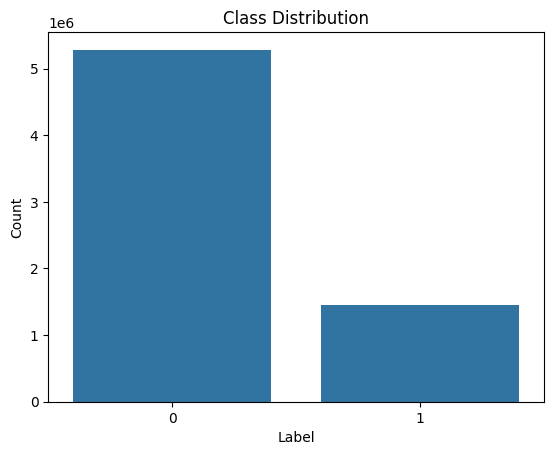

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='label', data=dataset)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [50]:
dataset['domain_length'] = dataset['domain'].apply(lambda x: len(str(x)))
numeric_dataset = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_dataset.corr()
print(correlation_matrix)

                            label   url_len  abnormal_url  use_of_ip_address  \
label                    1.000000  0.324584      0.003766           0.115216   
url_len                  0.324584  1.000000      0.000798           0.127823   
abnormal_url             0.003766  0.000798      1.000000           0.019471   
use_of_ip_address        0.115216  0.127823      0.019471           1.000000   
sum_count_special_chars  0.279453  0.782526      0.001424           0.107738   
https                    0.001474  0.000070      0.269407          -0.000046   
digits                   0.246661  0.800984      0.000975           0.117294   
letters                  0.317523  0.964168      0.000238           0.107015   
Shortining_Service       0.045620  0.039572      0.000771           0.001077   
google_index                  NaN       NaN           NaN                NaN   
domain_length            0.335527  0.268409     -0.003634          -0.103223   

                         sum_count_spec

In [51]:
numeric_dataset

,label,url_len,abnormal_url,use_of_ip_address,sum_count_special_chars,https,digits,letters,Shortining_Service,google_index,domain_length
0,1,34,0,0,2,0,0,31,0,1,29
1,0,16,0,0,1,0,0,15,0,1,16
2,0,35,0,0,3,0,0,28,0,1,18
3,1,37,0,0,2,0,0,34,0,1,36
4,0,12,0,0,2,0,0,10,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...
6728843,0,26,0,0,3,0,0,23,0,1,26
6728844,1,113,0,0,7,0,31,71,1,1,24
6728845,0,19,0,0,3,0,0,16,0,1,19
6728846,1,23,0,0,2,0,0,20,0,1,22


In [52]:
numeric_dataset = numeric_dataset.drop(['google_index'], axis = 1)

In [53]:
correlation_matrix = numeric_dataset.corr()

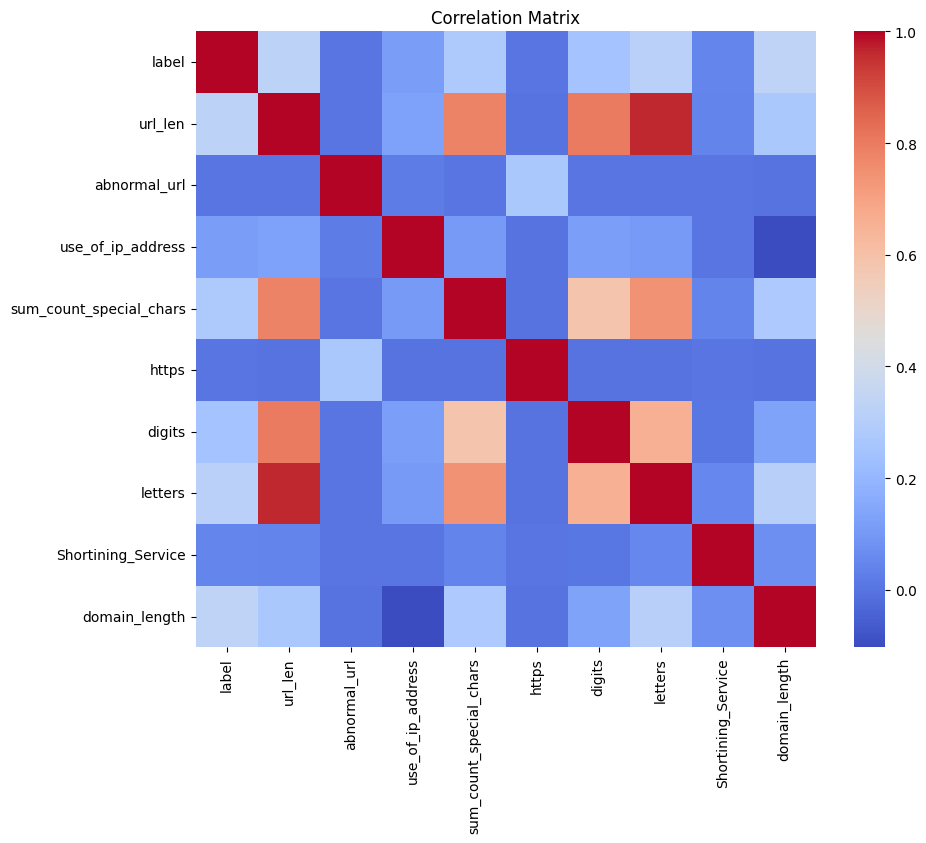

In [54]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

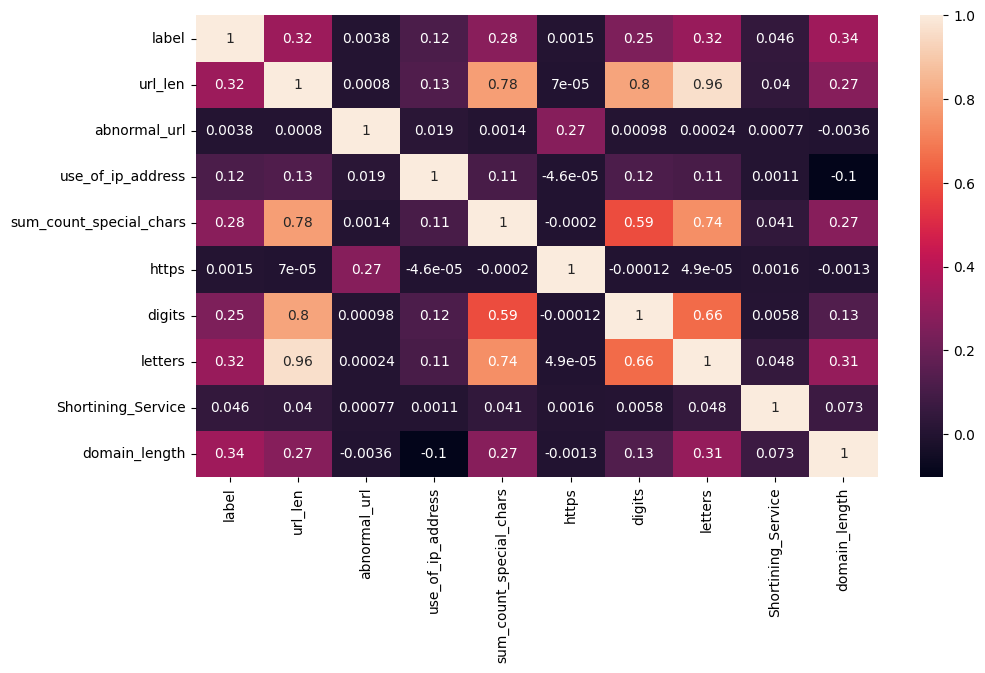

In [55]:
# Create a heatmap to visualize the correlation between different columns in the DataFrame 'data'
plt.figure(figsize=(11,6))
sns.heatmap(numeric_dataset.corr(),annot=True)

In [56]:
# Describe the specified columns in the DataFrame
dataset[['url_len', 'abnormal_url', 'sum_count_special_chars', 'letters', 'domain_length']].describe()


,url_len,abnormal_url,sum_count_special_chars,letters,domain_length
count,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06,6.728848e+06
mean,2.373479e+01,4.607029e-06,1.896645e+00,1.958107e+01,1.702998e+01
std,3.333289e+01,2.146394e-03,2.489148e+00,2.237642e+01,7.505858e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
25%,1.300000e+01,0.000000e+00,1.000000e+00,1.200000e+01,1.200000e+01
50%,1.800000e+01,0.000000e+00,1.000000e+00,1.600000e+01,1.600000e+01
75%,2.500000e+01,0.000000e+00,2.000000e+00,2.200000e+01,2.000000e+01
max,8.394000e+03,1.000000e+00,5.960000e+02,8.270000e+03,2.490000e+02


In [57]:
# Set display options
pd.set_option('display.float_format', lambda x: '%.0f' % x)

# Filter dataset based on label value 0 i.e. Benign
label_0_dataset = dataset[dataset['label'] == 0]
print("Summary statistics for Benign URLs")
print(label_0_dataset[['url_len', 'sum_count_special_chars', 'letters', 'domain_length']].describe())

# Filter dataset based on label value 1 i.e. Malicious
label_1_dataset = dataset[dataset['label'] == 1]
print("\nSummary statistics for Malicious URLs")
print(label_1_dataset[['url_len', 'sum_count_special_chars', 'letters', 'domain_length']].describe())

Summary statistics for Benign URLs
       url_len  sum_count_special_chars  letters  domain_length
count  5283175                  5283175  5283175        5283175
mean        18                        2       16             16
std         11                        1        8              5
min          2                        0        0              2
25%         12                        1       11             12
50%         16                        1       14             15
75%         21                        2       19             19
max        820                       86      621             87

Summary statistics for Malicious URLs
       url_len  sum_count_special_chars  letters  domain_length
count  1445673                  1445673  1445673        1445673
mean        44                        3       33             22
std         65                        5       43             11
min          2                        0        0              2
25%         22                

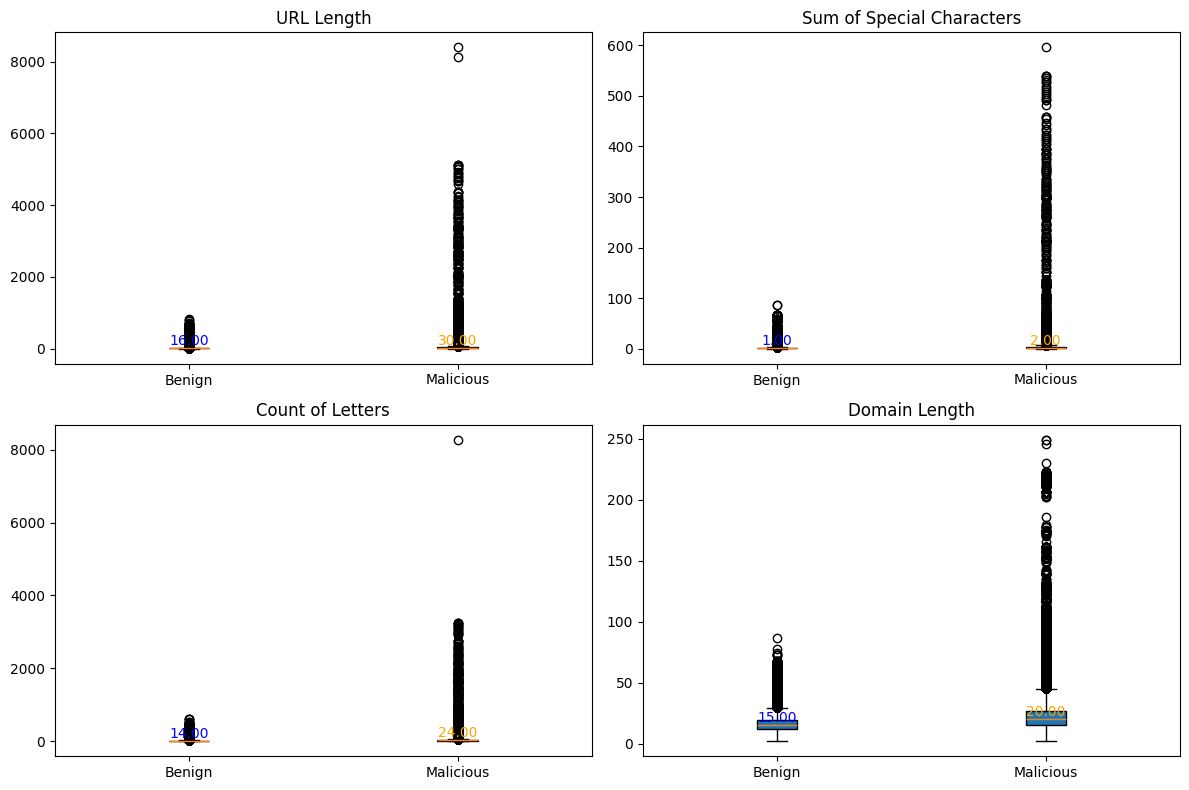

In [58]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Box plot for 'url_len'
bp1 = axs[0, 0].boxplot([label_0_dataset['url_len'], label_1_dataset['url_len']], patch_artist=True)
axs[0, 0].set_title('URL Length')
axs[0, 0].set_xticklabels(['Benign', 'Malicious'])

# Box plot for 'sum_count_special_chars'
bp2 = axs[0, 1].boxplot([label_0_dataset['sum_count_special_chars'], label_1_dataset['sum_count_special_chars']], patch_artist=True)
axs[0, 1].set_title('Sum of Special Characters')
axs[0, 1].set_xticklabels(['Benign', 'Malicious'])

# Box plot for 'letters'
bp3 = axs[1, 0].boxplot([label_0_dataset['letters'], label_1_dataset['letters']], patch_artist=True)
axs[1, 0].set_title('Count of Letters')
axs[1, 0].set_xticklabels(['Benign', 'Malicious'])

# Box plot for 'domain_length'
bp4 = axs[1, 1].boxplot([label_0_dataset['domain_length'], label_1_dataset['domain_length']], patch_artist=True)
axs[1, 1].set_title('Domain Length')
axs[1, 1].set_xticklabels(['Benign', 'Malicious'])

# Add median values to the box plots for Benign URLs
medians_0 = [np.median(label_0_dataset['url_len']), np.median(label_0_dataset['sum_count_special_chars']),
             np.median(label_0_dataset['letters']), np.median(label_0_dataset['domain_length'])]

# Add median values to the box plots for Malicious URLs
medians_1 = [np.median(label_1_dataset['url_len']), np.median(label_1_dataset['sum_count_special_chars']),
             np.median(label_1_dataset['letters']), np.median(label_1_dataset['domain_length'])]

for ax, medians_0_value, medians_1_value in zip(axs.flatten(), medians_0, medians_1):
    ax.text(1, medians_0_value, f'{medians_0_value:.2f}', ha='center', va='bottom', color='blue')
    ax.text(2, medians_1_value, f'{medians_1_value:.2f}', ha='center', va='bottom', color='orange')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [59]:
# Select the columns of interest
columns_of_interest = ['url_len', 'sum_count_special_chars', 'letters', 'domain_length', 'label']

# Create a pairplot with hue='label'
sns.pairplot(data=dataset[columns_of_interest], hue='label', diag_kind='hist', palette=['green', 'red'])

# Show the plot
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000289CFD27A30> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [61]:
dataset.shape
dataset

,url,label,url_len,domain,abnormal_url,use_of_ip_address,sum_count_special_chars,https,digits,letters,Shortining_Service,google_index,domain_length
0,irs-profilepaymentservice.com/home,1,34,irs-profilepaymentservice.com,0,0,2,0,0,31,0,1,29
1,cpuggsukabumi.id,0,16,cpuggsukabumi.id,0,0,1,0,0,15,0,1,16
2,members.tripod.com/~don_rc/ring.htm,0,35,members.tripod.com,0,0,3,0,0,28,0,1,18
3,optuswebmailadminprovider.weebly.com/,1,37,optuswebmailadminprovider.weebly.com,0,0,2,0,0,34,0,1,36
4,topoz.com.pl,0,12,topoz.com.pl,0,0,2,0,0,10,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728843,detektei-ivanov.weebly.com,0,26,detektei-ivanov.weebly.com,0,0,3,0,0,23,0,1,26
6728844,chase.trustbnkdirect.com/myaccount/access.php?...,1,113,chase.trustbnkdirect.com,0,0,7,0,31,71,1,1,24
6728845,image.gsfc.nasa.gov,0,19,image.gsfc.nasa.gov,0,0,3,0,0,16,0,1,19
6728846,unregistered-device.cc/,1,23,unregistered-device.cc,0,0,2,0,0,20,0,1,22


In [30]:
X = dataset.drop(['url','label','domain'],axis=1)
y = dataset['label']

In [31]:
X

,url_len,abnormal_url,use_of_ip_address,sum_count_special_chars,https,digits,letters,Shortining_Service,google_index
0,34,0,0,2,0,0,31,0,1
1,16,0,0,1,0,0,15,0,1
2,35,0,0,3,0,0,28,0,1
3,37,0,0,2,0,0,34,0,1
4,12,0,0,2,0,0,10,0,1
...,...,...,...,...,...,...,...,...,...
6728843,26,0,0,3,0,0,23,0,1
6728844,113,0,0,7,0,31,71,1,1
6728845,19,0,0,3,0,0,16,0,1
6728846,23,0,0,2,0,0,20,0,1


In [32]:
y

0          1
1          0
2          0
3          1
4          0
          ..
6728843    0
6728844    1
6728845    0
6728846    1
6728847    0
Name: label, Length: 6728848, dtype: int64

In [33]:
dataset.to_csv("./CSV/Final-edited.csv", index =False) ##Incase we want to export the extraploated features into a new CSV.

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=True, random_state=5)

In [76]:
print(f"X_train Shape : {X_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {X_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (5383078, 10)
Y_train Shape : (5383078,)
X_test  Shape : (1345770, 10)
Y_test  Shape : (1345770,)


In [35]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
ros = RandomOverSampler(sampling_strategy='minority')
X_over_resampled, y_over_resampled = ros.fit_resample(X_train, y_train)
rus = RandomUnderSampler(sampling_strategy='majority')
X_under_resampled, y_under_resampled = rus.fit_resample(X_train, y_train)

In [36]:
print(X_resampled.shape,y_resampled.shape)
print(X_over_resampled.shape,y_over_resampled.shape)
print(X_under_resampled.shape,y_under_resampled.shape)

(8453084, 9) (8453084,)
(8453084, 9) (8453084,)
(2313072, 9) (2313072,)


In [37]:
print(y_resampled.value_counts())
print(y_over_resampled.value_counts())
print(y_under_resampled.value_counts())

label
0    4226542
1    4226542
Name: count, dtype: int64
label
0    4226542
1    4226542
Name: count, dtype: int64
label
0    1156536
1    1156536
Name: count, dtype: int64


In [54]:
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(max_iter=1000, random_state=0)
classifier1.fit(X_resampled.values, y_resampled.values)
y_pred1 = classifier1.predict(X_test.values)

In [55]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

[[929466 127167]
 [ 85378 203759]]


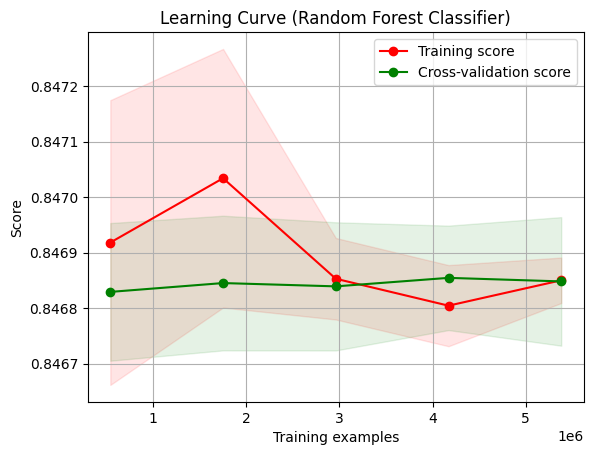

In [85]:
'''import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curve (Random Forest Classifier)"
plot_learning_curve(classifier1, title, X, y, cv=5)
plt.show()
'''

In [56]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred1)
print("Accuracy1:", accuracy1)

Accuracy1: 0.8420643943615922


In [57]:
from sklearn.neighbors import KNeighborsClassifier

classifier2 = KNeighborsClassifier(metric='euclidean', n_jobs = -1)
classifier2.fit(X_resampled.values, y_resampled.values)
y_pred2 = classifier2.predict(X_test.values)


In [58]:
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[998962  57671]
 [118567 170570]]


In [59]:
from sklearn.metrics import accuracy_score

accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy2:", accuracy2)

Accuracy2: 0.8690430014044005


In [60]:
from sklearn.naive_bayes import GaussianNB

classifier3 = GaussianNB()
classifier3.fit(X_resampled.values, y_resampled.values)
y_pred3 = classifier3.predict(X_test.values)

In [61]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[1037980   18653]
 [ 209877   79260]]


In [62]:
accuracy3 = accuracy_score(y_test, y_pred3)
print("Accuracy3:", accuracy3)

Accuracy3: 0.8301864360180418


In [63]:
from sklearn.tree import DecisionTreeClassifier 

classifier4 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
classifier4.fit(X_resampled.values, y_resampled.values)
y_pred4 = classifier4.predict(X_test.values)

In [64]:
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)

[[908575 148058]
 [ 57078 232059]]


In [65]:
from sklearn.metrics import accuracy_score

accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy4:", accuracy4)

Accuracy4: 0.8475697927580493


In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier5 = RandomForestClassifier(n_estimators=100, max_features='sqrt')
classifier5.fit(X_resampled.values, y_resampled.values)
y_pred5 = classifier5.predict(X_test.values)

In [48]:
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)

[[908126 148507]
 [ 56299 232838]]


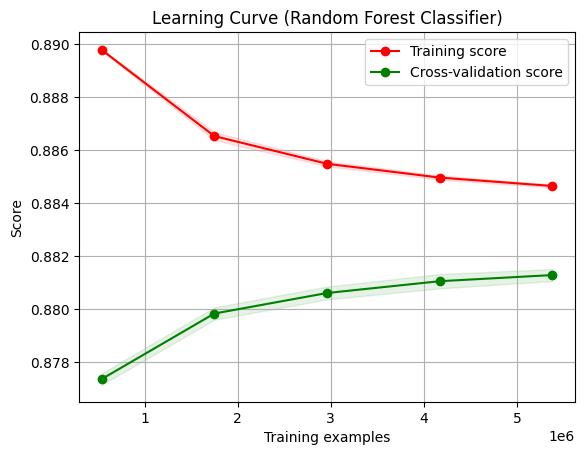

In [51]:
'''import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curve (Random Forest Classifier)"
plot_learning_curve(classifier5, title, X, y, cv=5)
plt.show()'''

In [50]:
accuracy5 = accuracy_score(y_test, y_pred5)
print("Accuracy5:", accuracy5)

Accuracy5: 0.8478150055358642


In [67]:
#Comparing accuracy
data = {
    'Model': ['LogisticRegression', 'KNeighborsClassifier', 'GaussianNB', 'DecisionTreeClassifier', 'RandomForestClassifier'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]
}

accuracy_table = pd.DataFrame(data)
print(accuracy_table)

                    Model  Accuracy
0      LogisticRegression  0.842064
1    KNeighborsClassifier  0.869043
2              GaussianNB  0.830186
3  DecisionTreeClassifier  0.847570
4  RandomForestClassifier  0.847815


In [ ]:
def get_url(url):
    url = url.replace('www.', '')
    url_len = len(url)
    letters_count = letter_count(url)
    digits_count  = digit_count(url)
    special_chars_count = sum_count_special_characters(url)
    shortened = Shortining_Service(url)
    abnormal = abnormal_url(url)
    secure_https = httpSecured(url)
    have_ip = having_ip_address(url)
    index_google = google_index(url)
    
    parsed_url  = urlparse(url)
    
    return {
        'url_len': url_len,
        'letters_count': letters_count,
        'digits_count': digits_count,
        'special_chars_count': special_chars_count,
        'shortened': shortened,
        'abnormal': abnormal,
        'secure_http': secure_https,
        'have_ip': have_ip,
        'GoogleIndex' : index_google
    }
 #Ignore this code for model deployment i think

In [ ]:
'''def model_predict(url):
    class_mapping = {
        0: 'benign',
        1: 'malware'
    }
    numerical_values = get_url(url)
    prediction_int = classifier5.predict(np.array(list(numerical_values.values())).reshape(1, -1))[0]
    prediction_label = class_mapping.get(prediction_int, 'Unknown')
    return prediction_int, prediction_label'''

In [66]:
from joblib import dump

# # classifier dumps
dump(classifier1, './Models/classifier1_model.joblib')
dump(classifier2, './Models/classifier2_model.joblib')
dump(classifier3, './Models/classifier3_model.joblib')
dump(classifier4, './Models/classifier4_model.joblib')
#dump(classifier5, './Models/classifier5_model.joblib')
#

['./Models/classifier4_model.joblib']

In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
classifier1_df = pd.DataFrame(data=[f1_score(y_test,y_pred1),accuracy_score(y_test, y_pred1), recall_score(y_test, y_pred1),
                   precision_score(y_test, y_pred1), roc_auc_score(y_test, y_pred1)], 
             columns=['Logistic Regression'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [205]:
classifier5_df = pd.DataFrame(data=[f1_score(y_test,y_pred5),accuracy_score(y_test, y_pred5), recall_score(y_test, y_pred5),
                   precision_score(y_test, y_pred5), roc_auc_score(y_test, y_pred5)], 
             columns=['Random Forest'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [206]:
classifier6_df = pd.DataFrame(data=[f1_score(y_test,y_tuned_pred1),accuracy_score(y_test, y_tuned_pred1), recall_score(y_test, y_tuned_pred1),
                   precision_score(y_test, y_tuned_pred1), roc_auc_score(y_test, y_tuned_pred1)], 
             columns=['Logistic Regression L1'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [207]:
classifier7_df = pd.DataFrame(data=[f1_score(y_test,y_tuned_pred1),accuracy_score(y_test, y_tuned_pred1), recall_score(y_test, y_tuned_pred1),
                   precision_score(y_test, y_tuned_pred1), roc_auc_score(y_test, y_tuned_pred1)], 
             columns=['Logistic Regression L2'],
             index=["F1","Accuracy", "Recall", "Precision", "ROC AUC Score"])

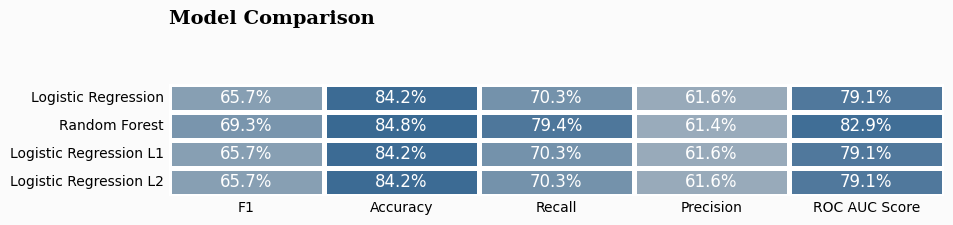

In [208]:
df_models = round(pd.concat([classifier1_df,classifier5_df,classifier6_df, classifier7_df], axis=1),4)
import matplotlib
colors = ["lightgray","lightgray","#0f4c81"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#fbfbfb"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".1%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.text(0,-2.15,'Model Comparison',fontsize=14,fontweight='bold',fontfamily='serif')
ax0.tick_params(axis=u'both', which=u'both',length=0)

plt.show()